## Importing useful libraries and reading dataset

In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#reading csv file
bike_sharing=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/day.csv')


In [4]:
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike_sharing.shape

(730, 16)

In [6]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In dataset there is no null values

In [7]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Casual v/s registered

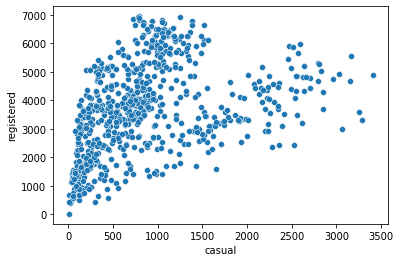

In [8]:
sns.scatterplot(data=bike_sharing,x='casual',y='registered')
plt.show()

Considering below variables to be dropped from dataset:

instant- shows index

dteday- from dteday useful information like month, year and day has been extracted and separate variables are created

atemp- similar variable temp is present 

casual , registered - cnt represent total of casual and registered customer

In [9]:
#list of columns which can be dropped
list_of_columns=['instant','dteday','atemp','casual','registered']

In [10]:
bs=bike_sharing.drop(list_of_columns,axis=1)

In [11]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


## Visualization

###Plot between cnt and numerical variables

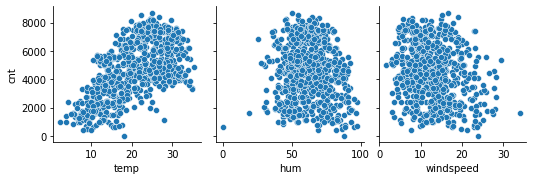

In [12]:
sns.pairplot(bs,x_vars=['temp','hum','windspeed'],y_vars=['cnt'])
plt.show()

We can see that temp and customer count is collinear compared to hum and windspeed

###Plot between cnt and categorical variables

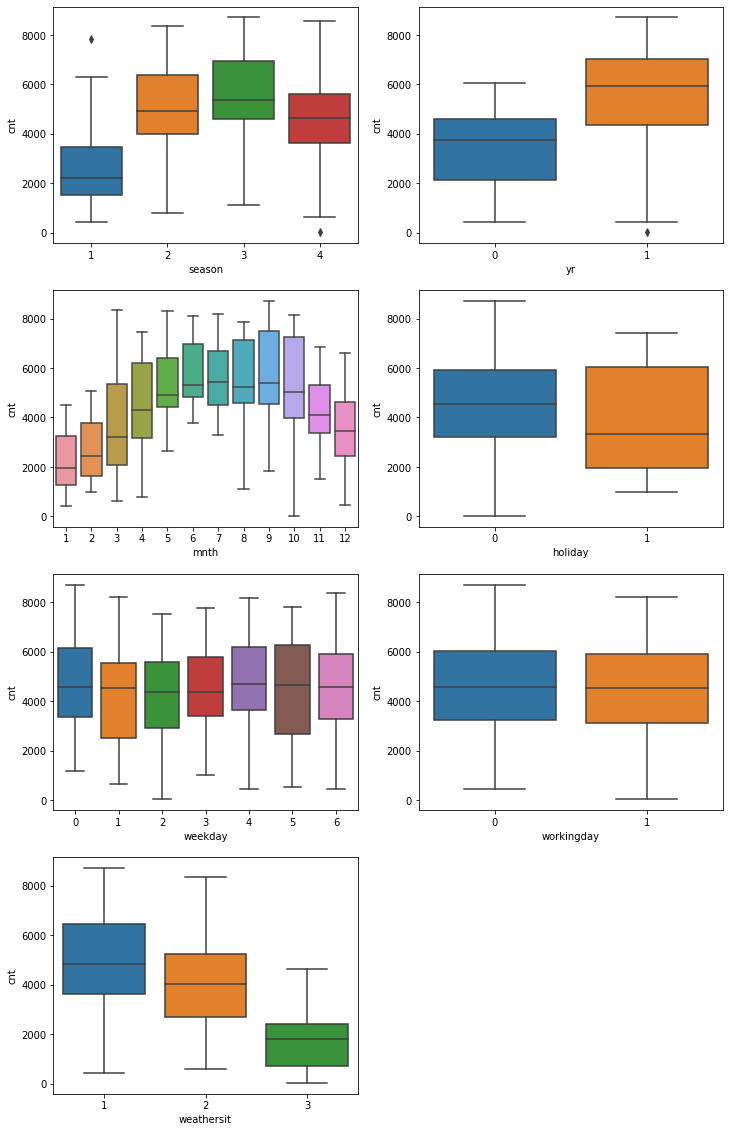

In [13]:
plt.figure(figsize=(12,20))
list_of_cat=['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in range(len(list_of_cat)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=list_of_cat[i],y='cnt',data=bs)
    

Season, month and weathersit effect count of customer

###Plot between numerical variable itself

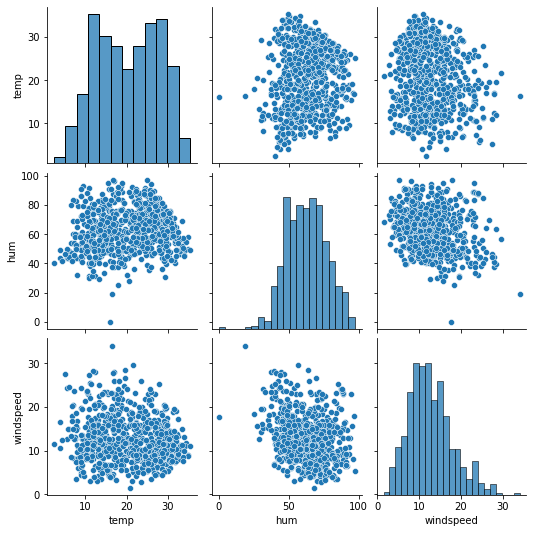

In [14]:
#list of numerical variable
list_of_numerical=['temp','hum','windspeed']
sns.pairplot(bs,x_vars=list_of_numerical,y_vars=list_of_numerical)

No visible relationship between temp, hum and windspeed

## Data Preparation

In [15]:
#creating dummy varaible for season 
bs_season_dummy=pd.get_dummies(bs['season']).rename(columns={1:'spring',2:'summer',3:'fall',4:'winter'})

In [16]:
#dropping season from dataframe
bs.drop(columns=['season'],inplace=True)

In [17]:
#concatinating dataframe with dummy variable
bs=pd.concat([bs,bs_season_dummy],axis=1)
bs.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,fall,winter
0,0,1,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0,0
1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801,1,0,0,0
2,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0
3,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0
4,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0


In [18]:
#creating dummy variable for month and concatinating it to dataframe
bs_mnth_dummy=pd.get_dummies(bs['mnth']).rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bs.drop(columns=['mnth'],inplace=True)
bs=pd.concat([bs,bs_mnth_dummy],axis=1)

In [19]:
bs.head()

,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec
0,0,0,1,1,2,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [20]:
#creating dummy variable for weathersit and concatinating it to dataframe
bs_dummy_weathersit=pd.get_dummies(bs['weathersit']).rename(columns={1:'Clear',2:'Mist',3:'Snowy',4:'Rainy'})
bs.drop(columns=['weathersit'],inplace=True)
bs=pd.concat([bs,bs_dummy_weathersit],axis=1)

In [21]:
bs.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy
0,0,0,1,1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,2,1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,3,1,8.050924,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,4,1,8.200000,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,5,1,9.305237,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
#creating dummy variable for weekday and concatinating it to dataframe
bs_dummy_weekday=pd.get_dummies(bs['weekday']).rename(columns={0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})
bs.drop(columns=['weekday'],inplace=True)
bs=pd.concat([bs,bs_dummy_weekday],axis=1)

In [23]:
bs.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [24]:
bs.shape


(730, 33)

## Splitting training and test set

In [25]:
#splitting the data into train and test set
np.random.seed(0)
bs_train, bs_test=train_test_split(bs,train_size=0.8, test_size=0.2,random_state=100)

In [26]:
bs_train.head()
bs_train.shape

(584, 33)

In [27]:
bs_test.head()
bs_test.shape

(146, 33)

Scaling using MinMaxScaler for temp, hum and windspeed

In [28]:
scaler=MinMaxScaler()


In [29]:
#MinMax Scaling 
bs_train[list_of_numerical]=scaler.fit_transform(bs_train[list_of_numerical])
bs_test[list_of_numerical]=scaler.fit_transform(bs_test[list_of_numerical])

In [30]:
bs_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
367,1,0,1,0.113228,0.454701,0.695175,2236,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
648,1,0,1,0.468352,0.477458,0.299450,7570,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
44,0,0,1,0.443431,0.387290,0.807474,1913,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
705,1,0,0,0.326094,0.787463,0.189819,5008,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
379,1,0,1,0.133996,0.431945,0.449210,2311,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [31]:
bs_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.649499,0.319463,4505.267123,0.251712,0.246575,0.251712,0.250000,0.087329,0.073630,0.090753,0.077055,0.087329,0.077055,0.075342,0.090753,0.080479,0.092466,0.080479,0.087329,0.630137,0.342466,0.027397,0.130137,0.155822,0.159247,0.136986,0.145548,0.152397,0.119863
std,0.500241,0.163378,0.446377,0.225336,0.144219,0.168114,1958.617712,0.434369,0.431387,0.434369,0.433384,0.282558,0.261392,0.287504,0.266907,0.282558,0.266907,0.264169,0.287504,0.272267,0.289931,0.272267,0.282558,0.483181,0.474941,0.163378,0.336743,0.362997,0.366220,0.344128,0.352955,0.359714,0.325080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,3070.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,4566.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,6035.750000,1.000000,0.000000,1.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
y_train=bs_train.pop('cnt')
X_train=bs_train

In [33]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
367,1,0,1,0.113228,0.454701,0.695175,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
44,0,0,1,0.443431,0.387290,0.807474,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
705,1,0,0,0.326094,0.787463,0.189819,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
379,1,0,1,0.133996,0.431945,0.449210,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [34]:
y_train.head()

367    2236
648    7570
44     1913
705    5008
379    2311
Name: cnt, dtype: int64

In [35]:
y_test=bs_test.pop('cnt')
X_test=bs_test

In [36]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
184,0,1,0,0.837241,0.534223,0.150577,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.470417,0.232972,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
299,0,0,0,0.496221,0.777843,0.446910,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
221,0,0,1,0.890387,0.236659,0.453268,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
152,0,0,0,0.821739,0.070765,0.687792,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [37]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

## Creating linear regression models


Function for creating linear regression model

In [38]:

def generate_equation(colNames,coeff):
  chunk_template = '({} * {})'
  get_chunk = lambda c,x : chunk_template.format(c,x)

  return 'cnt ='+' + '.join([ get_chunk(c,x) for x,c in zip(colNames, coeff)  if c> 0.0001] )

  

def create_lm(lr : LinearRegression):
  lr.fit(X_train,y_train)
  print("Coefficent ",lr.coef_)
  print("Intercept",lr.intercept_)
  y_pred=lr.predict(X_test)
  plt.figure(figsize=(6,12))
  plt.subplot(2,1,1)
  sns.scatterplot(y_test,y_pred)
  plt.plot(y_test,y_test,'r')
  plt.title('y_test v/s y_pred')
  plt.xlabel('y_test')
  plt.ylabel('y_pred')
  plt.subplot(2,1,2)
  y_train_pred=lr.predict(X_train)
  sns.distplot((y_train-y_train_pred),bins=20)
  plt.title('Error terms')
  plt.xlabel('error')
  print("R2 of training",r2_score(y_train,y_train_pred))
  print("R2 of test",r2_score(y_test,y_pred))

  colNames = X_train.columns
  coeff = lr.coef_
  equation = generate_equation(colNames, coeff) 
  print(equation) 
  return y_pred

### LR model 1

Coefficent  [ 1.98636684e+03 -1.13148260e+03 -4.10224631e+02  3.87131876e+03
 -1.30249899e+03 -1.53174575e+03  2.53797137e+15  2.53797137e+15
  2.53797137e+15  2.53797137e+15  1.50643418e+15  1.50643418e+15
  1.50643418e+15  1.50643418e+15  1.50643418e+15  1.50643418e+15
  1.50643418e+15  1.50643418e+15  1.50643418e+15  1.50643418e+15
  1.50643418e+15  1.50643418e+15  7.84428833e+14  7.84428833e+14
  7.84428833e+14 -6.04013654e+15 -6.04013654e+15 -6.04013654e+15
 -6.04013654e+15 -6.04013654e+15 -6.04013654e+15 -6.04013654e+15]
Intercept 1211302153731057.2
R2 of training 0.854735379814451
R2 of test 0.7878404375823231
cnt =(1986.3668434975552 * yr) + (3871.318764061572 * temp) + (2537971373123821.5 * spring) + (2537971373124669.0 * summer) + (2537971373124311.5 * fall) + (2537971373125269.0 * winter) + (1506434184048603.8 * Jan) + (1506434184048848.0 * Feb) + (1506434184049149.2 * Mar) + (1506434184049120.5 * Apr) + (1506434184049286.0 * May) + (1506434184049219.5 * Jun) + (150643418404

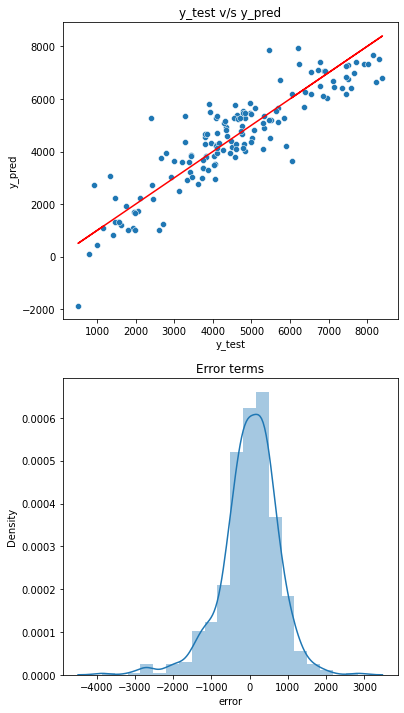

In [39]:
lr_1=LinearRegression()
y_lr_1_pred=create_lm(lr_1)


  

There is one outlier which has a negative prediction. Displaying which record is giving negative prediction.

We can see that error terms in training set is normally distributed

In [40]:
X_test[y_lr_1_pred<0]

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
25,0,0,1,0.160737,0.846868,0.691775,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


From this we can see model is giving unacceptable prediction (since customer count can't be negative) for atleast one record in test set. We need see if the model behaves similarly on the training set and gives negative predictions. 
To do this, we will apply the model on the training set and check if any prediction has negative values. 



In [41]:
y_lr_1_predict_train=lr_1.predict(X_train)

In [42]:
X_train[y_lr_1_predict_train<0]

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Dec,Clear,Mist,Snowy,Mon,Tue,Wed,Thurs,Fri,Sat,Sun
16,0,1,0,0.145417,0.553886,0.326153,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


The model behaves same way for traing set hence model needs to be improved
We will force coeeficeinets to be positive and force intercept as 0 in the model parameters

###LR model 2

In [43]:
lr_2=LinearRegression(positive=True,fit_intercept=False)

We are assuming intercept as zero as customer count can be zero but not negative

Coefficent  [1981.97502508    0.            0.         2357.3259985     0.
    0.            0.          732.60626369  464.49432811 1398.45245467
    0.            0.          488.28044959  632.29318707 1132.39941677
 1309.21945862  941.55719164 1330.31342847 1587.47690046  676.93034328
    0.            0.         1095.79332506  414.1465412     0.
  252.56821302    0.            0.            0.          230.97956653
  134.96300603  180.58342101]
Intercept 0.0
R2 of training 0.8100098101327875
R2 of test 0.8073452554963991
cnt =(1981.9750250837599 * yr) + (2357.32599849677 * temp) + (732.6062636924586 * summer) + (464.494328106031 * fall) + (1398.4524546666435 * winter) + (488.2804495945941 * Mar) + (632.293187072644 * Apr) + (1132.3994167681694 * May) + (1309.2194586158996 * Jun) + (941.5571916419184 * Jul) + (1330.3134284722523 * Aug) + (1587.47690045641 * Sept) + (676.930343277223 * Oct) + (1095.7933250633753 * Clear) + (414.146541201866 * Mist) + (252.56821301759538 * Mon) + (230.

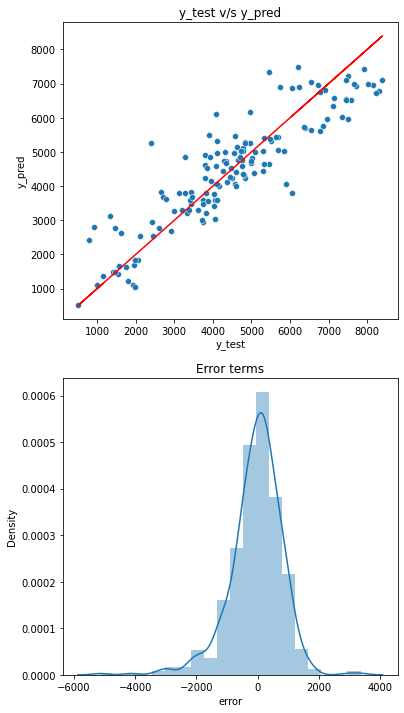

In [44]:
y_lr_2_pred=create_lm(lr_2)

No negative predictions with this model

Error terms are normally distributed

Columns value zero indicates that model has considered weight of those variable as zero

Printing columns which have zero coefficient

In [45]:
list(filter(lambda x: x[1] ,zip(X_train.columns, lr_2.coef_)))


[('yr', 1981.9750250837599),
 ('temp', 2357.32599849677),
 ('summer', 732.6062636924586),
 ('fall', 464.494328106031),
 ('winter', 1398.4524546666435),
 ('Mar', 488.2804495945941),
 ('Apr', 632.293187072644),
 ('May', 1132.3994167681694),
 ('Jun', 1309.2194586158996),
 ('Jul', 941.5571916419184),
 ('Aug', 1330.3134284722523),
 ('Sept', 1587.47690045641),
 ('Oct', 676.930343277223),
 ('Clear', 1095.7933250633753),
 ('Mist', 414.146541201866),
 ('Mon', 252.56821301759538),
 ('Fri', 230.97956653140147),
 ('Sat', 134.9630060345647),
 ('Sun', 180.58342101255573)]

Model is giving these variables weightable as zero which does not make sense.
These variables should be given some wightage as they should also play some role in helping us predict the number of customers

Function for calculating VIF 

In [46]:
def create_VIF(df):
  vif=pd.DataFrame()
  vif['feature']=df.columns
  vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  vif['VIF']=round(vif['VIF'],2)
  return vif


####VIF considering all features from training set

In [47]:
vif=create_VIF(X_train)
vif

,feature,VIF
0,yr,1.05
1,holiday,8.30
2,workingday,71.01
3,temp,7.03
4,hum,2.10
5,windspeed,1.23
6,spring,inf
7,summer,inf
8,fall,inf
9,winter,inf


Month, weekday, season and weathersit are highly collinear as sum of months will be 1 same for weekday and weathrsit.
So dropping spring from season, Dec from month, Sun from weekday and Snowy from weathersit

Function for dropping column

In [48]:
def drop_column(col):
  X_train.drop(columns=col,axis=1,inplace=True)
  X_test.drop(columns=col,axis=1,inplace=True)
  if col not in X_train.columns:
    print(f'Dropped {col} from training set')

  if col not in X_test.columns:
    print(f'Dropped {col} from test set')




In [49]:
list_of_col=['Dec','Sun','Snowy','spring']
for col in list_of_col:
  drop_column(col)

Dropped Dec from training set
Dropped Dec from test set
Dropped Sun from training set
Dropped Sun from test set
Dropped Snowy from training set
Dropped Snowy from test set
Dropped spring from training set
Dropped spring from test set


In [50]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Clear,Mist,Mon,Tue,Wed,Thurs,Fri,Sat
367,1,0,1,0.113228,0.454701,0.695175,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
648,1,0,1,0.468352,0.477458,0.299450,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1
44,0,0,1,0.443431,0.387290,0.807474,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
705,1,0,0,0.326094,0.787463,0.189819,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
379,1,0,1,0.133996,0.431945,0.449210,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [51]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,summer,fall,winter,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sept,Oct,Nov,Clear,Mist,Mon,Tue,Wed,Thurs,Fri,Sat
184,0,1,0,0.837241,0.534223,0.150577,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
535,1,0,1,0.911423,0.470417,0.232972,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.496221,0.777843,0.446910,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
221,0,0,1,0.890387,0.236659,0.453268,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
152,0,0,0,0.821739,0.070765,0.687792,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


Calculating VIF after dropping Spring, Dec, Sun and Snowy from training set as well test set

####VIF after dropping Spring, Dec, Sun and Snowy

In [52]:
vif1=create_VIF(X_train)
vif1

,feature,VIF
0,yr,2.14
1,holiday,8.53
2,workingday,259.13
3,temp,46.94
4,hum,24.53
5,windspeed,4.75
6,summer,9.54
7,fall,14.08
8,winter,9.15
9,Jan,3.03


For below list of varaibles VIF value is greater than 10

In [53]:
vif1[vif1['VIF']>10]

,feature,VIF
2,workingday,259.13
3,temp,46.94
4,hum,24.53
7,fall,14.08
20,Clear,15.80
23,Tue,56.54
24,Wed,57.39
25,Thurs,48.60
26,Fri,52.82
27,Sat,55.24


Dropping workingday from data set

In [54]:
drop_column('workingday')

Dropped workingday from training set
Dropped workingday from test set


####VIF after dropping workingday

In [55]:
vif2=create_VIF(X_train)
vif2

,feature,VIF
0,yr,2.13
1,holiday,1.13
2,temp,46.90
3,hum,24.52
4,windspeed,4.74
5,summer,9.53
6,fall,14.08
7,winter,9.12
8,Jan,3.03
9,Feb,2.68


Comparing before dropping weekday and after dropping VIF


In [56]:
vif1.merge(vif2,on='feature')

,feature,VIF_x,VIF_y
0,yr,2.14,2.13
1,holiday,8.53,1.13
2,temp,46.94,46.90
3,hum,24.53,24.52
4,windspeed,4.75,4.74
5,summer,9.54,9.53
6,fall,14.08,14.08
7,winter,9.15,9.12
8,Jan,3.03,3.03
9,Feb,2.68,2.68


After dropping weekday we can see VIF values of holiday, tue, wed, thurs, fri, sat has greatly decreased from approx 57(high correlation) to 2 (way below benchmark meaning nearly no correlation)









Dropping fall as its VIF is around 14 and these seasonal variables will be highly correlated

In [57]:
drop_column('fall')

Dropped fall from training set
Dropped fall from test set


####VIF after dropping fall 

In [58]:
vif3=create_VIF(X_train)
vif3

,feature,VIF
0,yr,2.13
1,holiday,1.13
2,temp,45.75
3,hum,24.11
4,windspeed,4.74
5,summer,6.73
6,winter,6.78
7,Jan,2.82
8,Feb,2.46
9,Mar,3.27


In [59]:
vif2.merge(vif3,on='feature')

,feature,VIF_x,VIF_y
0,yr,2.13,2.13
1,holiday,1.13,1.13
2,temp,46.90,45.75
3,hum,24.52,24.11
4,windspeed,4.74,4.74
5,summer,9.53,6.73
6,winter,9.12,6.78
7,Jan,3.03,2.82
8,Feb,2.68,2.46
9,Mar,3.32,3.27


After dropping fall from season inter-correlation between different seasons has come down. 

Dropping temp as it has VIF around 45(benchmark is 10)

####VIF after dropping temp

In [60]:
drop_column('temp')

Dropped temp from training set
Dropped temp from test set


In [61]:
vif4=create_VIF(X_train)
vif4

,feature,VIF
0,yr,2.07
1,holiday,1.12
2,hum,19.34
3,windspeed,4.71
4,summer,6.66
5,winter,6.77
6,Jan,2.72
7,Feb,2.46
8,Mar,3.06
9,Apr,4.64


In [62]:
vif3.merge(vif4,on='feature')

,feature,VIF_x,VIF_y
0,yr,2.13,2.07
1,holiday,1.13,1.12
2,hum,24.11,19.34
3,windspeed,4.74,4.71
4,summer,6.73,6.66
5,winter,6.78,6.77
6,Jan,2.82,2.72
7,Feb,2.46,2.46
8,Mar,3.27,3.06
9,Apr,5.28,4.64


After dropping temp we cannot see any significant drop in VIF value

###LR model 3

In [63]:
lr_3=LinearRegression(positive=True, fit_intercept=False)

Coefficent  [2048.48244697    0.            0.            0.          438.6986776
 1538.84332298    0.          104.49532301 1022.23279762 1558.72386229
 2422.50802235 2902.45894177 2884.01107281 3129.43666798 2998.89846555
 1277.61578279  190.24135308 1643.88782597  946.33919321  240.8474981
    0.            0.            0.          254.34475563  185.83710639]
Intercept 0.0
R2 of training 0.7910704077327252
R2 of test 0.7925678876313519
cnt =(2048.4824469691407 * yr) + (438.69867759530496 * summer) + (1538.843322977938 * winter) + (104.4953230137791 * Feb) + (1022.2327976239181 * Mar) + (1558.7238622933082 * Apr) + (2422.508022352746 * May) + (2902.458941766184 * Jun) + (2884.0110728072104 * Jul) + (3129.4366679788204 * Aug) + (2998.8984655536988 * Sept) + (1277.6157827865209 * Oct) + (190.24135308112187 * Nov) + (1643.8878259722953 * Clear) + (946.3391932112111 * Mist) + (240.84749809639962 * Mon) + (254.34475562872063 * Fri) + (185.83710639319565 * Sat)


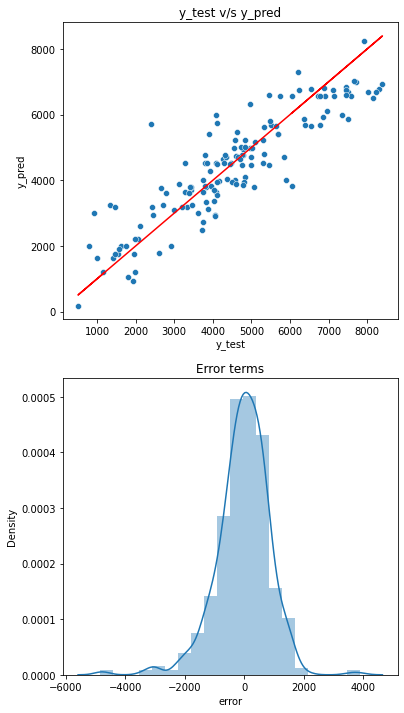

In [64]:
y_pred3=create_lm(lr_3)

In [65]:
list(filter(lambda x: x[1] ,zip(X_train.columns, lr_3.coef_)))


[('yr', 2048.4824469691407),
 ('summer', 438.69867759530496),
 ('winter', 1538.843322977938),
 ('Feb', 104.4953230137791),
 ('Mar', 1022.2327976239181),
 ('Apr', 1558.7238622933082),
 ('May', 2422.508022352746),
 ('Jun', 2902.458941766184),
 ('Jul', 2884.0110728072104),
 ('Aug', 3129.4366679788204),
 ('Sept', 2998.8984655536988),
 ('Oct', 1277.6157827865209),
 ('Nov', 190.24135308112187),
 ('Clear', 1643.8878259722953),
 ('Mist', 946.3391932112111),
 ('Mon', 240.84749809639962),
 ('Fri', 254.34475562872063),
 ('Sat', 185.83710639319565)]

Displaying column name and coefficient of model

In [66]:
lr3_coeff=pd.DataFrame()
lr3_coeff['col']=X_train.columns
lr3_coeff['coeff']=lr_3.coef_
lr3_coeff

,col,coeff
0,yr,2048.482447
1,holiday,0.000000
2,hum,0.000000
3,windspeed,0.000000
4,summer,438.698678
5,winter,1538.843323
6,Jan,0.000000
7,Feb,104.495323
8,Mar,1022.232798
9,Apr,1558.723862


Columns with coefficient value zero

In [67]:
lr3_coeff[lr3_coeff['coeff']<0.000001]

,col,coeff
1,holiday,0.0
2,hum,0.0
3,windspeed,0.0
6,Jan,0.0
20,Tue,0.0
21,Wed,0.0
22,Thurs,0.0


###LR model 4

Coefficent  [ 2088.5051366   -666.11237133  -383.89562751 -1468.42494205
   454.95850617  1234.96314651  -613.02271944   -22.53192645
   842.61913466  1432.54695877  2110.83073168  2566.28749604
  2580.02826392  2780.31062633  2792.489426    1398.67436771
   310.9395086   2570.94000293  1901.34278162    33.7603184
  -387.50374596  -330.50586268  -155.6008456      4.69241502
     3.05882841]
Intercept 266.2331043030481
R2 of training 0.8228563313859929
R2 of test 0.7601580372311201
cnt =(2088.50513659688 * yr) + (454.95850616925316 * summer) + (1234.963146505268 * winter) + (842.6191346589819 * Mar) + (1432.5469587657453 * Apr) + (2110.8307316756195 * May) + (2566.287496037606 * Jun) + (2580.028263919215 * Jul) + (2780.3106263325003 * Aug) + (2792.4894260017854 * Sept) + (1398.674367710561 * Oct) + (310.9395085973976 * Nov) + (2570.9400029250723 * Clear) + (1901.342781623446 * Mist) + (33.7603184000293 * Mon) + (4.692415019961402 * Fri) + (3.0588284070018474 * Sat)


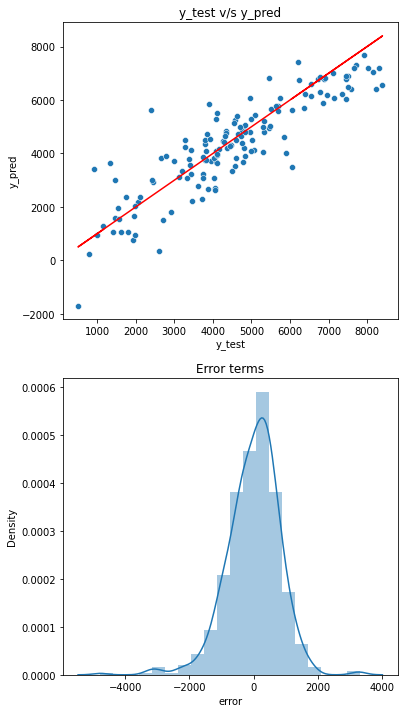

In [68]:
lr_4=LinearRegression()
y_pred5=create_lm(lr_4)


Outlier is there for single record i.e negative which is not desirable

In [69]:
list(filter(lambda x: x[1] ,zip(X_train.columns, lr_4.coef_)))


[('yr', 2088.50513659688),
 ('holiday', -666.1123713342133),
 ('hum', -383.8956275145226),
 ('windspeed', -1468.4249420453755),
 ('summer', 454.95850616925316),
 ('winter', 1234.963146505268),
 ('Jan', -613.022719442885),
 ('Feb', -22.53192645085248),
 ('Mar', 842.6191346589819),
 ('Apr', 1432.5469587657453),
 ('May', 2110.8307316756195),
 ('Jun', 2566.287496037606),
 ('Jul', 2580.028263919215),
 ('Aug', 2780.3106263325003),
 ('Sept', 2792.4894260017854),
 ('Oct', 1398.674367710561),
 ('Nov', 310.9395085973976),
 ('Clear', 2570.9400029250723),
 ('Mist', 1901.342781623446),
 ('Mon', 33.7603184000293),
 ('Tue', -387.503745962311),
 ('Wed', -330.5058626805778),
 ('Thurs', -155.60084559973035),
 ('Fri', 4.692415019961402),
 ('Sat', 3.0588284070018474)]

We have variables for month.
We also have variable for season i.e summer and winter.
VIF of summer and winter is slightly higher.
We can get season from month as well.
We might not need ssummer and winter variables in our model
So creating another model by dropping these two variables

In [70]:
drop_column('summer')
drop_column('winter')


Dropped summer from training set
Dropped summer from test set
Dropped winter from training set
Dropped winter from test set


####VIF after dropping summer and winter

In [71]:
vif5=create_VIF(X_train)
vif5

,feature,VIF
0,yr,2.06
1,holiday,1.11
2,hum,17.42
3,windspeed,4.70
4,Jan,1.93
5,Feb,1.81
6,Mar,1.97
7,Apr,1.88
8,May,2.01
9,Jun,1.82


Comparing vif before and after dropping summer and winter 

In [72]:
vif4.merge(vif5,on='feature')

,feature,VIF_x,VIF_y
0,yr,2.07,2.06
1,holiday,1.12,1.11
2,hum,19.34,17.42
3,windspeed,4.71,4.70
4,Jan,2.72,1.93
5,Feb,2.46,1.81
6,Mar,3.06,1.97
7,Apr,4.64,1.88
8,May,5.23,2.01
9,Jun,3.48,1.82


After dropping summer and winter VIF for month has come down to around 2(close to independent)

###LR model 5

Coefficent  [2086.22915547    0.            0.            0.            0.
    0.          831.6769468  1649.66957687 2509.3576323  2842.74517578
 2541.76338933 2774.56419166 3049.58018559 2495.18437116 1394.2841122
 1963.36537564 1286.56236203  280.20387086    0.            0.
    0.          244.14889134  205.06532321]
Intercept 0.0
R2 of training 0.7532974249363787
R2 of test 0.7816811051815205
cnt =(2086.2291554744124 * yr) + (831.6769468010119 * Mar) + (1649.6695768650684 * Apr) + (2509.357632303666 * May) + (2842.7451757831027 * Jun) + (2541.7633893320267 * Jul) + (2774.5641916550007 * Aug) + (3049.580185592825 * Sept) + (2495.184371164626 * Oct) + (1394.284112197233 * Nov) + (1963.3653756363396 * Clear) + (1286.5623620275235 * Mist) + (280.20387086370556 * Mon) + (244.14889134271263 * Fri) + (205.06532321460162 * Sat)


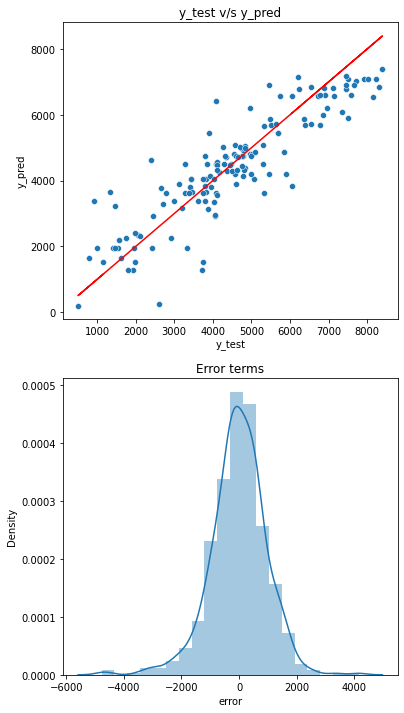

In [73]:
lr_5=LinearRegression(positive=True,fit_intercept=False)
y_pred_5=create_lm(lr_5)

To check if yr is important factor or not while considering so we will drop yr from dataset and will create model for that dataset

In [74]:
list(filter(lambda x: x[1] ,zip(X_train.columns, lr_5.coef_)))


[('yr', 2086.2291554744124),
 ('Mar', 831.6769468010119),
 ('Apr', 1649.6695768650684),
 ('May', 2509.357632303666),
 ('Jun', 2842.7451757831027),
 ('Jul', 2541.7633893320267),
 ('Aug', 2774.5641916550007),
 ('Sept', 3049.580185592825),
 ('Oct', 2495.184371164626),
 ('Nov', 1394.284112197233),
 ('Clear', 1963.3653756363396),
 ('Mist', 1286.5623620275235),
 ('Mon', 280.20387086370556),
 ('Fri', 244.14889134271263),
 ('Sat', 205.06532321460162)]

Reading dataset

In [75]:
bs_1=bike_sharing.drop(list_of_columns,axis=1)

In [76]:
bs_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


Creating dummy variables for categorical features

In [77]:
dum=pd.get_dummies(bs_1,columns=['season','weekday','mnth'],drop_first=True).rename(columns={'season_2':'summer','season_3':'fall','season_4':'winter',
                   'weekday_1':'mon','weekday_2':'tue','weekday_3':'wed','weekday_4':'thurs','weekday_5':'fri','weekday_6':'sat',
                   'mnth_2':'feb','mnth_3':'mar','mnth_4':'apr','mnth_5':'may','mnth_6':'jun','mnth_7':'jul','mnth_8':'aug','mnth_9':'sept','mnth_10':'oct','mnth_11':'nov','mnth_12':'dec'})


In [78]:
dum.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter,mon,tue,wed,thurs,fri,sat,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
0,0,0,1,2,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [79]:
dum.shape


(730, 28)

In [80]:
dum.drop(columns=['yr'],axis=1,inplace=True)

In [81]:
dum.head()

,holiday,workingday,weathersit,temp,hum,windspeed,cnt,summer,fall,winter,mon,tue,wed,thurs,fri,sat,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
0,0,1,2,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,2,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Creating test and train set

In [82]:
np.random.seed(0)
bs1_train, bs1_test=train_test_split(dum,train_size=0.8, test_size=0.2,random_state=100)

In [83]:
bs1_train.shape

(584, 27)

In [84]:
bs1_test.shape

(146, 27)

In [85]:
y_train=bs1_train.pop('cnt')
X_train=bs1_train
y_test=bs1_test.pop('cnt')
X_test=bs1_test

In [86]:
X_train.head()

,holiday,workingday,weathersit,temp,hum,windspeed,summer,fall,winter,mon,tue,wed,thurs,fri,sat,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec
367,0,1,1,6.150000,44.1250,24.499957,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
648,0,1,1,17.835000,46.3333,12.166932,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
44,0,1,1,17.015000,37.5833,27.999836,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
705,0,0,2,13.154153,76.4167,8.750200,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
379,0,1,1,6.833347,41.9167,16.834286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


###LR model 6

Coefficent  [   0.            0.            0.          178.70077791    0.
    0.          542.94621665    0.         1433.36073639    0.
    0.           61.67493449  376.431158    134.34468782  158.2464403
  280.13987439  451.88137339  625.90105579  268.65771006  463.06595302
   12.03555046  476.31114721  846.61514563   38.75553377    0.
  131.90700824]
Intercept 0.0
R2 of training 0.4981453855601068
R2 of test 0.26394952987100107
cnt =(178.7007779137922 * temp) + (542.9462166475789 * summer) + (1433.3607363936692 * winter) + (61.674934488388686 * wed) + (376.4311579978797 * thurs) + (134.34468782405168 * fri) + (158.24644030261675 * sat) + (280.1398743869263 * feb) + (451.88137338853016 * mar) + (625.9010557904228 * apr) + (268.6577100611995 * may) + (463.0659530229009 * jun) + (12.035550457869768 * jul) + (476.3111472114975 * aug) + (846.6151456287616 * sept) + (38.75553376822102 * oct) + (131.90700824201153 * dec)


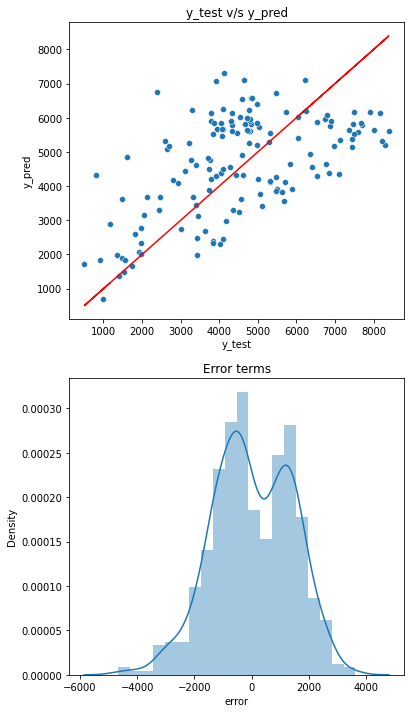

In [87]:
lr_6=LinearRegression(positive=True,fit_intercept=False)
y_pred6=create_lm(lr_6)

After dropping yr model has r square around 0.263 which has dropped down significantly compared to one where yr was considered.

This shows we have to consider yr as a factor for creation of model

In [88]:
vif8=create_VIF(X_train)
vif8

,feature,VIF
0,holiday,8.48
1,workingday,257.53
2,weathersit,13.21
3,temp,52.17
4,hum,33.23
5,windspeed,6.46
6,summer,9.57
7,fall,14.41
8,winter,10.06
9,mon,56.08


After dropping yr VIF of workingday is around 260 which has increased significantly compared to when yr was considered (around 72)

#Final model

Equation of final model which is having R square of 0.7925 is:

cnt=(yr* 2048.4824469691407)+ (summer* 438.69867759530496)+ (winter* 1538.843322977938)+ (Feb* 104.4953230137791)+ (Mar* 1022.2327976239181)+ (Apr* 1558.7238622933082)+ (May* 2422.508022352746)+ (Jun* 2902.458941766184)+ (Jul* 2884.0110728072104)+ (Aug* 3129.4366679788204)+ (Sept* 2998.8984655536988)+ (Oct* 1277.6157827865209)+ (Nov* 190.24135308112187)+ (Clear* 1643.8878259722953)+ (Mist* 946.3391932112111)+ (Mon* 240.84749809639962)+ (Fri* 254.34475562872063)+ (Sat* 185.83710639319565)